In [ ]:
WORKINH NEW CODE

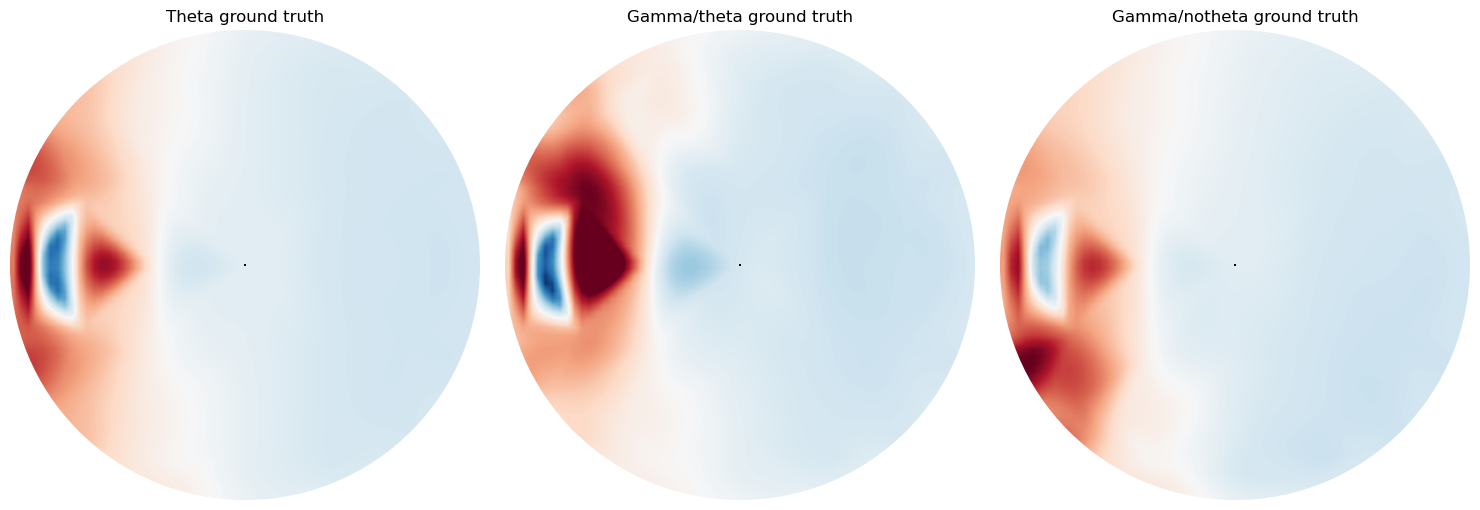


Verification values:
Theta dipole first 5 values: [8.3873702  7.85347425 8.79696528 8.81243634 8.53258496]
Shape of leadfield: (3, 64, 2004)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import mne
from mne.viz import plot_topomap

# Load the data
file_path = r"C:\Users\fedor\Documents\CODE\EEG\PAC_WM_Cohen\emptyEEG.mat"
eeg_data = sio.loadmat(file_path)

# Extract EEG data and properties
raw_data = np.zeros((64, 1))  
srate = float(eeg_data['EEG']['srate'][0,0][0,0])
chanlocs = eeg_data['EEG']['chanlocs'][0,0]

# Create channel positions and names
pos_3d = np.zeros((64, 3))
ch_names = []

for i in range(64):
    pos_3d[i, 0] = chanlocs[0,i]['X'][0][0]
    pos_3d[i, 1] = chanlocs[0,i]['Y'][0][0]
    pos_3d[i, 2] = chanlocs[0,i]['Z'][0][0]
    
    # Extract the full channel name
    label = chanlocs[0,i]['labels']
    name = label.item()
    ch_names.append(name)

# Project 3D positions to 2D for plotting
# Using azimuthal equidistant projection
r = np.sqrt(pos_3d[:, 0]**2 + pos_3d[:, 1]**2 + pos_3d[:, 2]**2)
theta = np.arccos(pos_3d[:, 2] / r)
phi = np.arctan2(pos_3d[:, 1], pos_3d[:, 0])

# Convert to 2D coordinates
pos = np.zeros((64, 2))
pos[:, 0] = r * np.sin(theta) * np.cos(phi)
pos[:, 1] = r * np.sin(theta) * np.sin(phi)

# Extract and fix leadfield
lf_gain = eeg_data['lf']['Gain'][0,0]
lf_gain_fixed = np.transpose(lf_gain, (1,0,2))  # Reorder dimensions to match MATLAB

# Adjust indices for 0-based indexing
whichOri = 1
theta_dipole = 94
gam1_dipole = 109
gam2_dipole = 111

whichOri_adj = whichOri - 1
theta_dipole_adj = theta_dipole - 1
gam1_dipole_adj = gam1_dipole - 1
gam2_dipole_adj = gam2_dipole - 1

# Plot
clim = [-45, 45]
fig = plt.figure(figsize=(15, 5))

# Common topomap parameters
topomap_params = dict(
    sensors=False,
    contours=0,
    cmap='RdBu',
    vlim=clim,
    outlines='head',
    image_interp='cubic',
    show=False
)

# Plot 1 - Theta ground truth
ax1 = plt.subplot(131)
mne.viz.plot_topomap(lf_gain_fixed[whichOri_adj, :, theta_dipole_adj], 
                     pos,
                     axes=ax1,
                     **topomap_params)
ax1.set_title('Theta ground truth')

# Plot 2 - Gamma/theta ground truth
ax2 = plt.subplot(132)
mne.viz.plot_topomap(lf_gain_fixed[whichOri_adj, :, gam1_dipole_adj], 
                     pos,
                     axes=ax2,
                     **topomap_params)
ax2.set_title('Gamma/theta ground truth')

# Plot 3 - Gamma/notheta ground truth
ax3 = plt.subplot(133)
mne.viz.plot_topomap(lf_gain_fixed[whichOri_adj, :, gam2_dipole_adj], 
                     pos,
                     axes=ax3,
                     **topomap_params)
ax3.set_title('Gamma/notheta ground truth')

plt.tight_layout()
plt.show()

# Print verification values
print("\nVerification values:")
print("Theta dipole first 5 values:", lf_gain_fixed[whichOri_adj, :5, theta_dipole_adj])
print("Shape of leadfield:", lf_gain_fixed.shape)

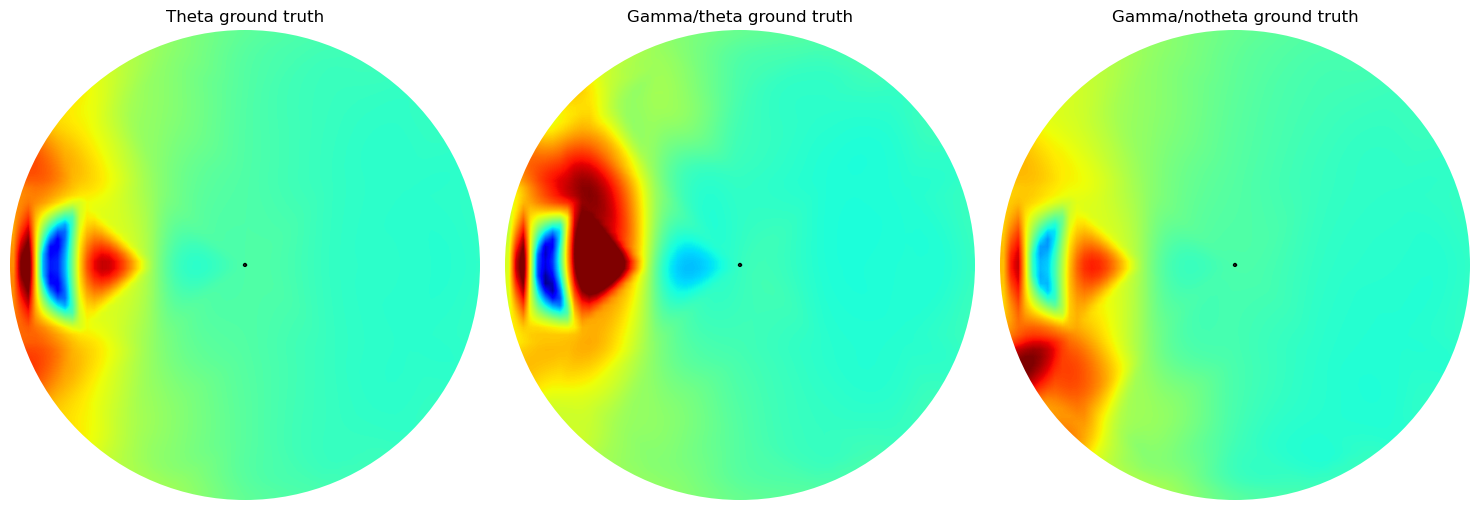

In [36]:
# Common topomap parameters
topomap_params = dict(
    sensors=False,
    contours=0,
    cmap='jet',  # Change to jet colormap to match original
    vlim=(-clim[1], -clim[0]),  # Flip the limits to match original
    outlines='head',  # Use 'head' instead of 'circle'
    image_interp='cubic',
    show=False,
    sphere=0.5  # Control head size
)

# Plot with flipped data
fig = plt.figure(figsize=(15, 5))

# Plot 1 - Theta ground truth
ax1 = plt.subplot(131)
mne.viz.plot_topomap(-lf_gain_fixed[whichOri_adj, :, theta_dipole_adj], 
                     pos,
                     axes=ax1,
                     **topomap_params)
ax1.set_title('Theta ground truth')

# Plot 2 - Gamma/theta ground truth
ax2 = plt.subplot(132)
mne.viz.plot_topomap(-lf_gain_fixed[whichOri_adj, :, gam1_dipole_adj], 
                     pos,
                     axes=ax2,
                     **topomap_params)
ax2.set_title('Gamma/theta ground truth')

# Plot 3 - Gamma/notheta ground truth
ax3 = plt.subplot(133)
mne.viz.plot_topomap(-lf_gain_fixed[whichOri_adj, :, gam2_dipole_adj], 
                     pos,
                     axes=ax3,
                     **topomap_params)
ax3.set_title('Gamma/notheta ground truth')

plt.tight_layout()
plt.show()

CHECKIMH OF DATA VALID

In [37]:
print('=== Python Values ===')
print('First 10 values for theta dipole:')
print(lf_gain_fixed[whichOri_adj, :10, theta_dipole_adj])

print('\nFirst 10 values for gamma1 dipole:')
print(lf_gain_fixed[whichOri_adj, :10, gam1_dipole_adj])

print('\nFirst 10 values for gamma2 dipole:')
print(lf_gain_fixed[whichOri_adj, :10, gam2_dipole_adj])

# Statistics
theta_data = lf_gain_fixed[whichOri_adj, :, theta_dipole_adj]
print('\nStatistics for theta dipole:')
print(f'Mean: {np.mean(theta_data):.6f}')
print(f'Std: {np.std(theta_data):.6f}')
print(f'Min: {np.min(theta_data):.6f}')
print(f'Max: {np.max(theta_data):.6f}')

=== Python Values ===
First 10 values for theta dipole:
[8.3873702  7.85347425 8.79696528 8.81243634 8.53258496 7.97019173
 7.29438609 6.06837173 6.69798162 7.34839143]

First 10 values for gamma1 dipole:
[7.87132608 7.24857958 8.79444028 9.68795794 9.2207114  8.07141952
 6.82973726 5.57878052 6.91233097 8.60251781]

First 10 values for gamma2 dipole:
[7.9996471  7.18976224 8.40874162 8.50798993 7.86995782 7.02887836
 6.34936285 4.90475342 5.44853078 6.3264769 ]

Statistics for theta dipole:
Mean: -2.117195
Std: 12.271076
Min: -40.560684
Max: 9.035068


JUST BEAUTIFUL VERSION OF PLOTTING

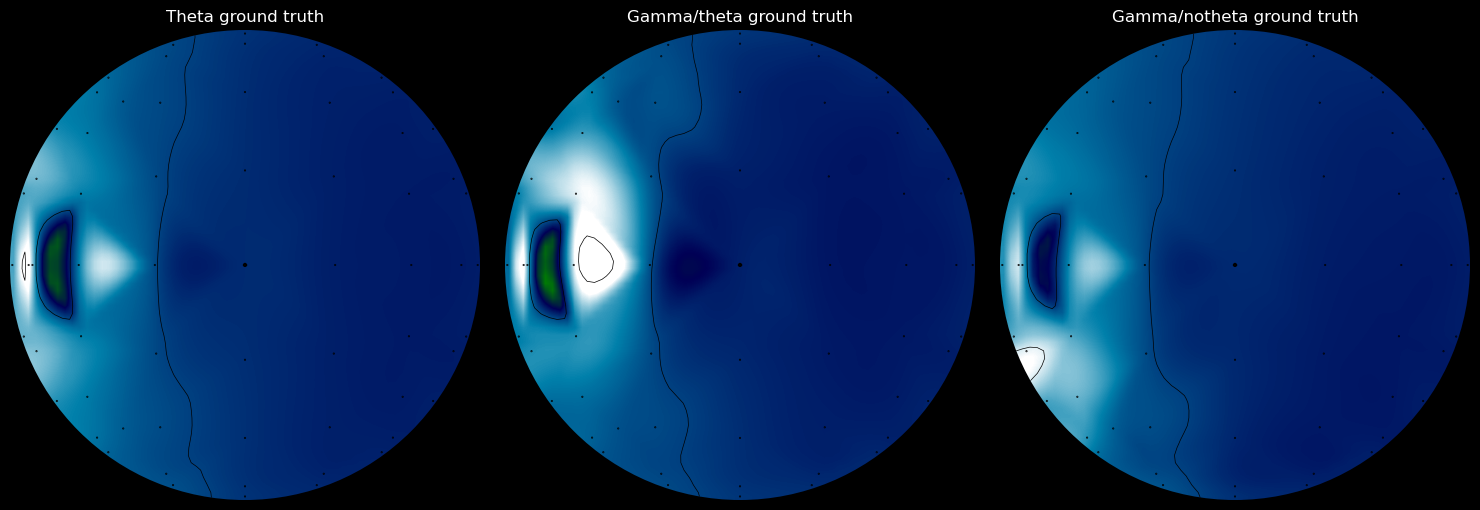

In [3]:
import matplotlib.pyplot as plt
import mne

# Common topomap parameters
topomap_params = dict(
    sensors=True,
    contours=1,
    cmap='ocean',  # Change to jet colormap to match original
    vlim=(-clim[1], -clim[0]),  # Flip the limits to match original
    outlines='head',  # Use 'head' instead of 'circle'
    image_interp='cubic',
    show=False,
    sphere=0.5  # Control head size
)

# Set the background color to black
fig = plt.figure(figsize=(15, 5), facecolor='black')

# Plot 1 - Theta ground truth
ax1 = plt.subplot(131, facecolor='black')
mne.viz.plot_topomap(-lf_gain_fixed[whichOri_adj, :, theta_dipole_adj], 
                     pos,
                     axes=ax1,
                     **topomap_params)
ax1.set_title('Theta ground truth', color='white')

# Plot 2 - Gamma/theta ground truth
ax2 = plt.subplot(132, facecolor='black')
mne.viz.plot_topomap(-lf_gain_fixed[whichOri_adj, :, gam1_dipole_adj], 
                     pos,
                     axes=ax2,
                     **topomap_params)
ax2.set_title('Gamma/theta ground truth', color='white')

# Plot 3 - Gamma/notheta ground truth
ax3 = plt.subplot(133, facecolor='black')
mne.viz.plot_topomap(-lf_gain_fixed[whichOri_adj, :, gam2_dipole_adj], 
                     pos,
                     axes=ax3,
                     **topomap_params)
ax3.set_title('Gamma/notheta ground truth', color='white')

# Set the color of the axis labels and ticks to white
for ax in [ax1, ax2, ax3]:
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

plt.tight_layout()
plt.show()

TILL THIS MOMNT THE DATA IDENTICAL TO MATLAB

CREATING NOISE

phase 1 import and setup

In [4]:
import numpy as np
from scipy.linalg import eigh

# Get dimensions from leadfield
n_dipoles = lf_gain.shape[2]  # 2004
n_timepoints = eeg_data['EEG']['pnts'][0,0][0,0]  # 10241

print("Number of dipoles:", n_dipoles)
print("Number of timepoints:", n_timepoints)

Number of dipoles: 2004
Number of timepoints: 10241


2 create and process correlation matrix

In [5]:
# Create correlation matrix
cormat = np.random.rand(n_dipoles, n_dipoles)
cormat = cormat @ cormat.T
cormat = 0.8 * (cormat / np.max(cormat))
np.fill_diagonal(cormat, 1)

# Eigendecomposition
evals, evecs = eigh(cormat)

print("Correlation matrix shape:", cormat.shape)
print("Eigenvalues shape:", evals.shape)

Correlation matrix shape: (2004, 2004)
Eigenvalues shape: (2004,)


In [ ]:
GENERATE FREQUENCY DOMAIN DATA

In [29]:
# Create 1/f noise
n_freqs = n_timepoints // 2
freq_data = np.exp(1j * 2 * np.pi * np.random.rand(n_dipoles, n_freqs))
freq_scaling = 0.1 + np.exp(-np.arange(n_freqs)/200)
ps = freq_data * freq_scaling[np.newaxis, :]

# Make it symmetric for real IFFT
ps = np.hstack([ps, np.zeros((n_dipoles, 1)), ps[:, ::-1]])

print("Power spectrum shape:", ps.shape)

Power spectrum shape: (2004, 10241)


TIME DOMAIN CONVERSION

In [30]:
# Convert to time domain and apply correlation
ifft_data = np.real(np.fft.ifft(ps, axis=1))  # Shape: (2004, 10241)
corr_transform = (evecs @ np.sqrt(np.diag(evals)))  # Shape: (2004, 2004)
data = 100 * (corr_transform.T @ ifft_data)  

print("Final data shape:", data.shape)
print("\nFirst few values:")
print(data[:5, :5])

Final data shape: (2004, 10241)

First few values:
[[-0.10540506 -0.10123829 -0.01742204 -0.04548348 -0.09322176]
 [-0.11555696 -0.16539561 -0.08890463 -0.08397712 -0.05941508]
 [-0.00322857 -0.0058897  -0.01576926 -0.02089438  0.01607319]
 [ 0.12641909  0.00935849  0.05451704  0.06566138  0.13932397]
 [ 0.05111848  0.13038921  0.05482401  0.04744409  0.01309968]]


PLOTTING NOISE

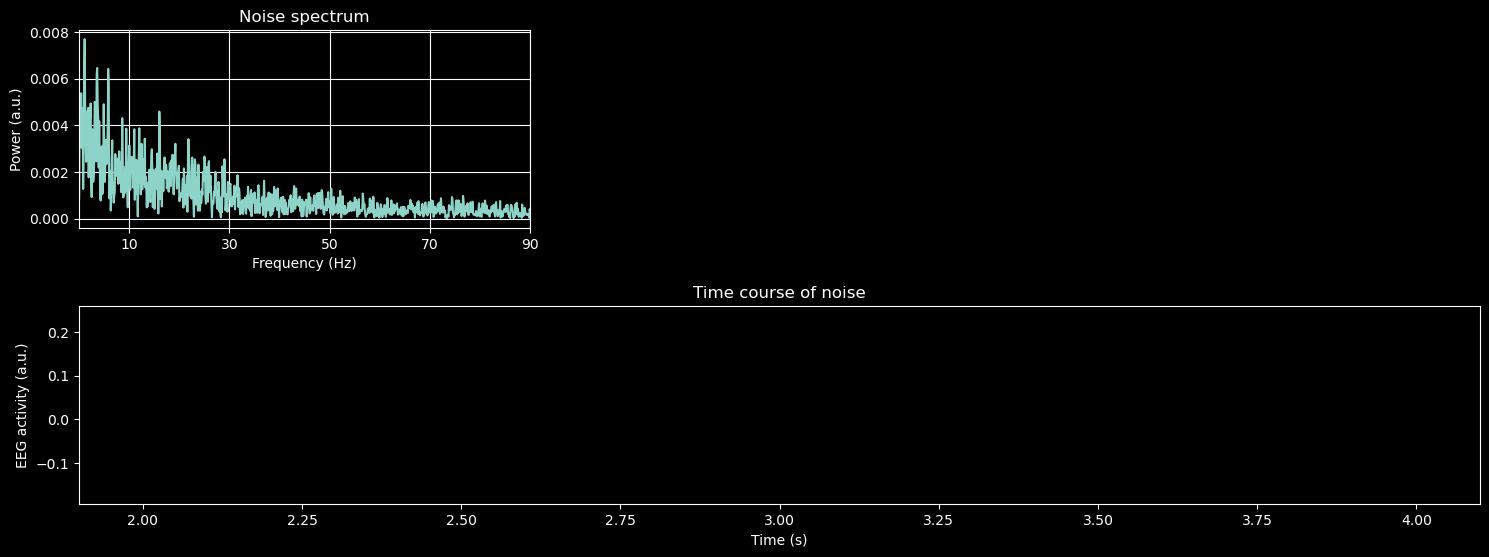


Noise statistics:
Mean: -0.000018
Std: 0.130173
Min: -16.380131
Max: 14.662786


In [33]:
import matplotlib.pyplot as plt
from scipy import signal

# Get time vector and frequencies
times = eeg_data['EEG']['times'][0,0][0]  # Get times from EEG structure
hz = np.linspace(0, srate, n_timepoints)

# Create figure
fig = plt.figure(figsize=(15, 8))

# Plot 1: Power spectrum (top left)
plt.subplot(331)
fft_data = np.abs(np.fft.fft(data[0,:]))/n_timepoints
plt.plot(hz, fft_data)
plt.xlim([0, 90])
plt.xticks(np.arange(10, 91, 20))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (a.u.)')
plt.title('Noise spectrum')
plt.grid(True)

# Plot 2: Time course segment (middle)
plt.subplot(312)
# Plot 2-4 second segment like in MATLAB
time_idx = np.where((times >= 2) & (times <= 4))[0]
plt.plot(times[time_idx], data[0, time_idx], 'k', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('EEG activity (a.u.)')
plt.title('Time course of noise')

# Adjust layout
plt.tight_layout()
plt.show()

# Print some statistics to verify the noise properties
print("\nNoise statistics:")
print(f"Mean: {np.mean(data):.6f}")
print(f"Std: {np.std(data):.6f}")
print(f"Min: {np.min(data):.6f}")
print(f"Max: {np.max(data):.6f}")

INTERACTIVE PLOT KINDA

Creating RawArray with float64 data, n_channels=2004, n_times=10241
    Range : 0 ... 10240 =      0.000 ...    10.000 secs
Ready.
Using matplotlib as 2D backend.


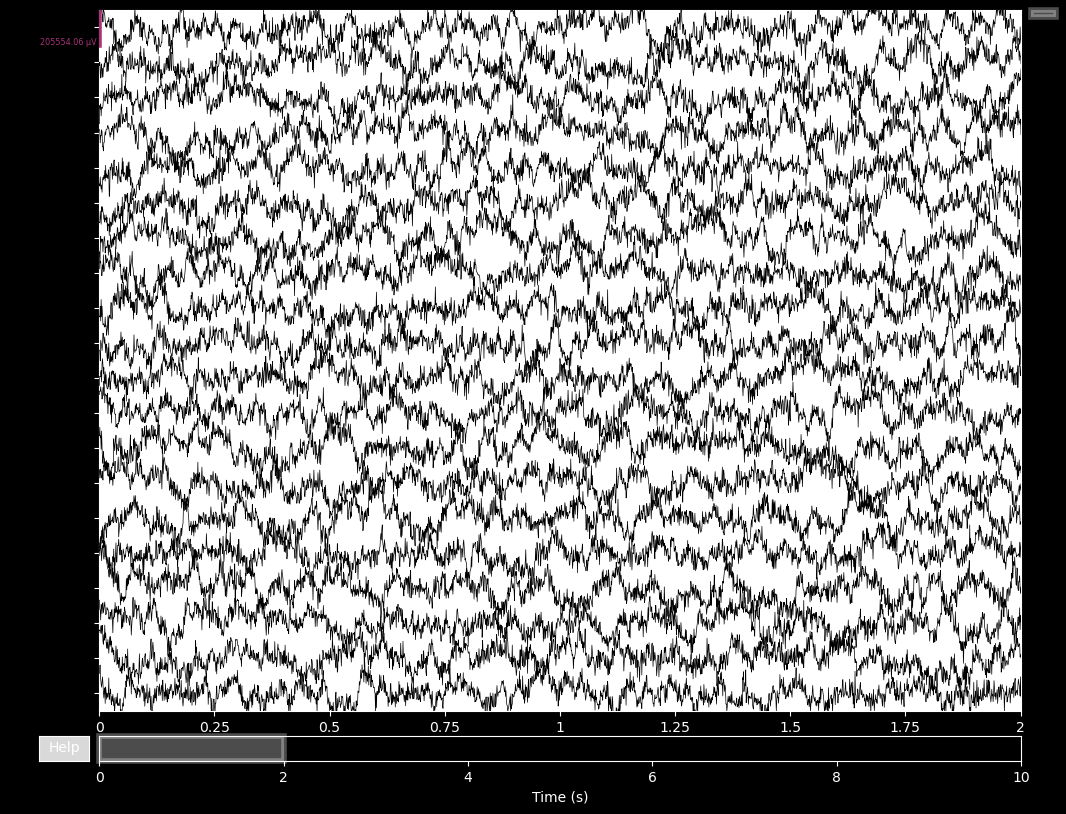

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


C:\Users\fedor\AppData\Local\Temp\ipykernel_44652\3035801027.py:30: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.plot_psd(
C:\Users\fedor\.conda\envs\mne_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


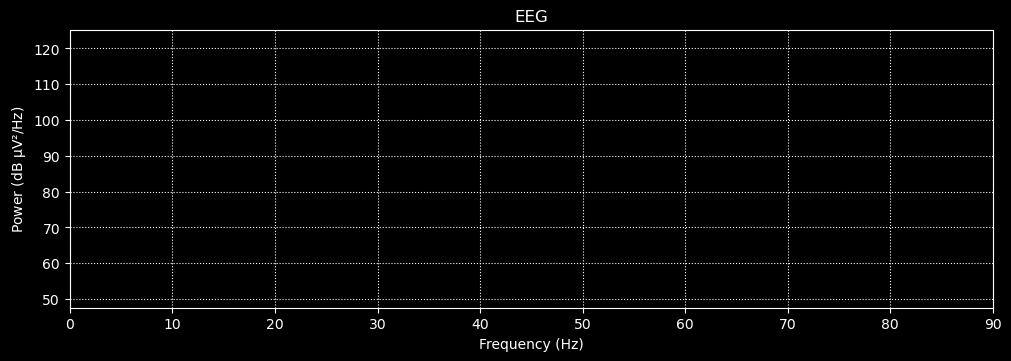

In [10]:
import mne
import numpy as np

# Create MNE Raw object from our noise data
# First create info structure
ch_names = [f'channel_{i}' for i in range(data.shape[0])]
ch_types = ['eeg'] * data.shape[0]
info = mne.create_info(ch_names=ch_names, sfreq=srate, ch_types=ch_types)

# Create Raw object
raw = mne.io.RawArray(data, info)

# Set plotting parameters for dark style
mne.viz.set_browser_backend('matplotlib')
plt.style.use('dark_background')

# Plot with MNE - this will open an interactive window
raw.plot(
    duration=2,  # how many seconds to display at once
    start=0,  # where to start plotting
    n_channels=20,  # number of channels to display
    scalings='auto',  # or specify scaling like scalings=dict(eeg=100)
    theme='dark',  # use dark theme
    title='Simulated 1/f Noise',
    show=True,
    block=True
)

# You can also create a PSD plot with dark theme
fig = raw.plot_psd(
    fmin=0,
    fmax=90,
    tmin=0,
    tmax=None,
    picks='all',
    color='white',
    show=True
)

REPLACING ONE DIPOLE WITH THETA OSCILLATIONS

In [8]:
# Parameters
theta_freq = 6  # Hz, as in MATLAB code

def filterFGx(data, srate, lower_freq, upper_freq):
    # We'll need to implement this filter function
    from scipy import signal
    nyq = srate/2
    b, a = signal.butter(2, [lower_freq/nyq, upper_freq/nyq], btype='band')
    return signal.filtfilt(b, a, data)

# Create theta oscillation
ampl1 = 5 + 10 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30)
freqmod1 = signal.detrend(10 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30))
theta_wave = ampl1 * np.sin(2*np.pi * theta_freq * times + 2*np.pi/srate * np.cumsum(freqmod1))

print("Shape of theta wave:", theta_wave.shape)
print("First few values of theta wave:", theta_wave[:5])

Shape of theta wave: (10241,)
First few values of theta wave: [0.02346993 0.13928377 0.20094205 0.22193534 0.2147037 ]


CHECKING AMPLITUDE MODULATION

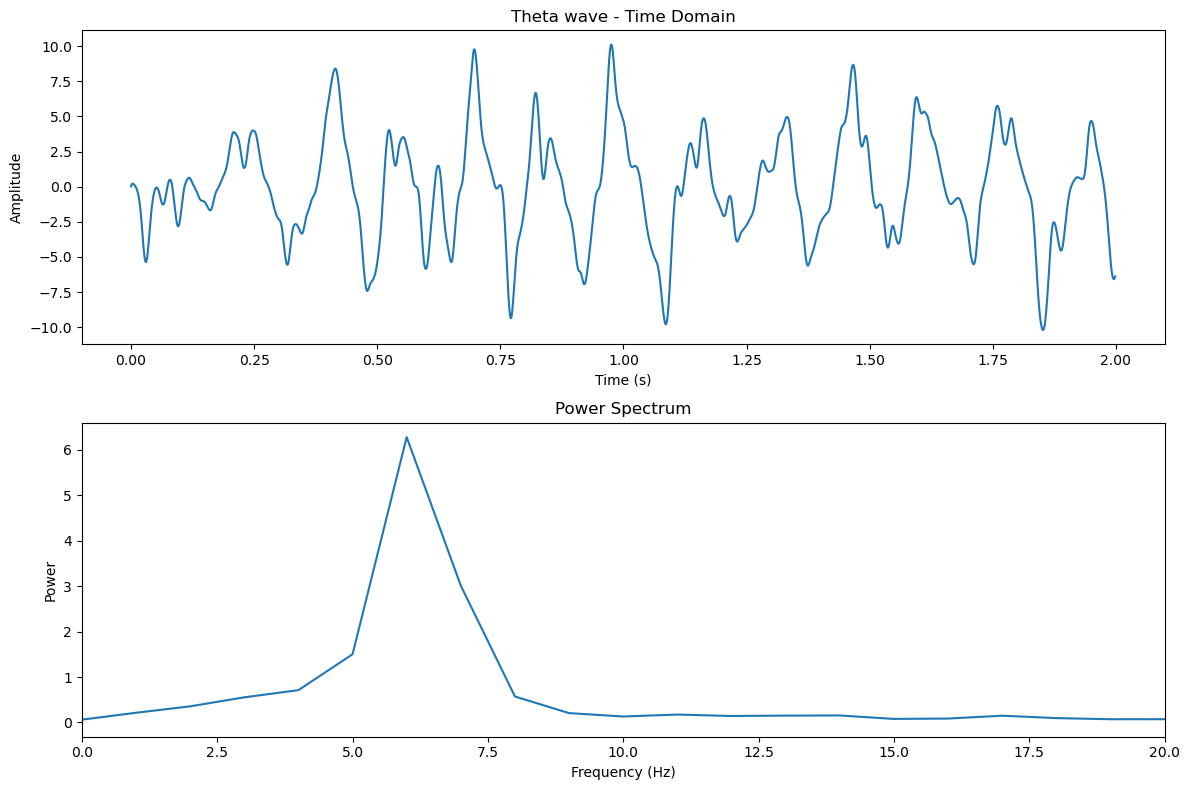

In [15]:
# Plot theta wave characteristics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Time domain plot - show a segment
segment = slice(0, int(2*srate))  # 2 seconds
ax1.plot(times[segment], theta_wave[segment])
ax1.set_title('Theta wave - Time Domain')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# Frequency domain
freqs, pxx = signal.welch(theta_wave, fs=srate, nperseg=1024)
ax2.plot(freqs, pxx)
ax2.set_xlim([0, 20])  # Focus on lower frequencies
ax2.set_title('Power Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power')

plt.tight_layout()
plt.show()

CREATING GAMMA BURSTS

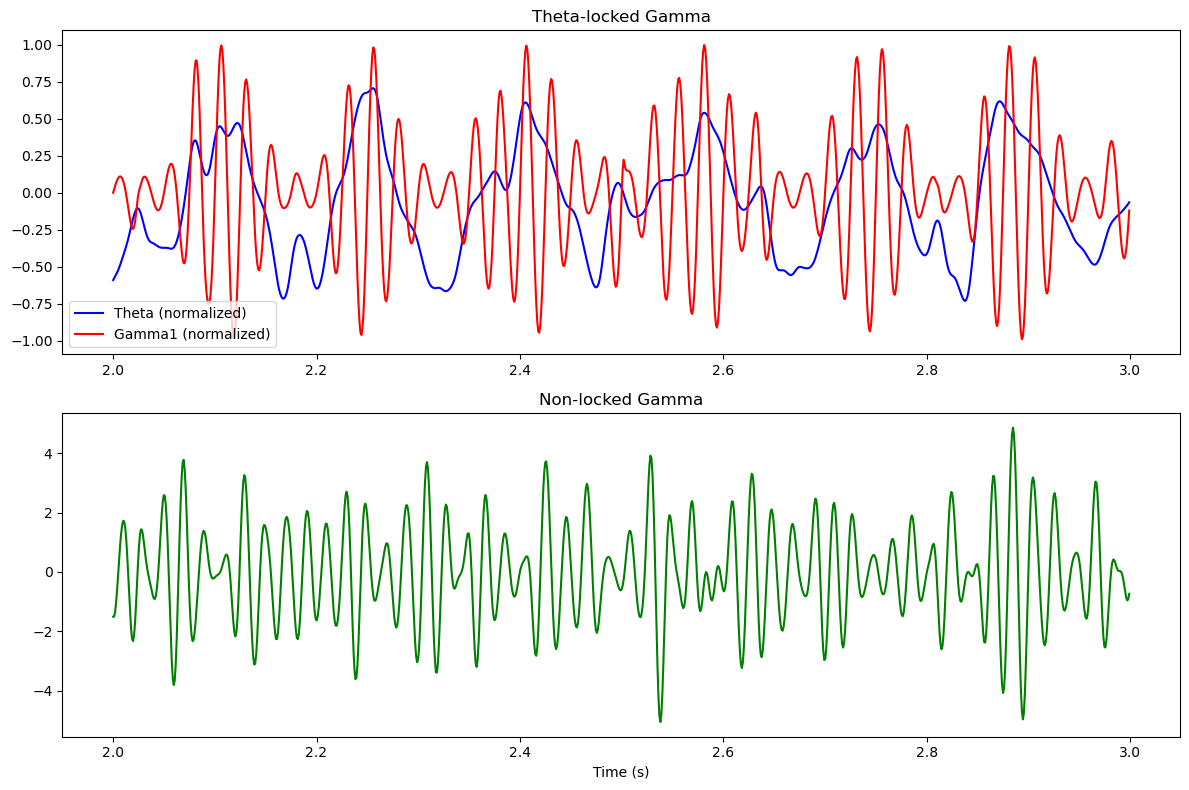

In [19]:
# Gamma burst generation
gamma_freq = 40  # Hz, as in MATLAB code

# Create gamma bursts locked to theta phase
from scipy.signal import hilbert

# Calculate theta phase and create modulation
theta_phase = np.angle(hilbert(theta_wave))
mod1 = 0.1 + 0.9 * (1 + np.real(np.exp(1j * theta_phase))) / 2
gamma1_wave = mod1 * np.sin(2*np.pi * gamma_freq * times)

# Also create the second gamma wave (not locked to theta)
ampl2 = 2 + 5 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30)
freqmod2 = signal.detrend(10 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30))
gamma2_wave = ampl2 * np.sin(2*np.pi * 50 * times + 2*np.pi/srate * np.cumsum(freqmod2))

# Let's verify the gamma waves
plt.figure(figsize=(12, 8))

# Plot 1: Gamma1 (theta-locked) and theta
plt.subplot(211)
segment = slice(int(2*srate), int(3*srate))  # Plot 1 second
plt.plot(times[segment], theta_wave[segment]/max(abs(theta_wave)), 'b', label='Theta (normalized)')
plt.plot(times[segment], gamma1_wave[segment]/max(abs(gamma1_wave)), 'r', label='Gamma1 (normalized)')
plt.title('Theta-locked Gamma')
plt.legend()

# Plot 2: Gamma2 (not locked)
plt.subplot(212)
plt.plot(times[segment], gamma2_wave[segment], 'g')
plt.title('Non-locked Gamma')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

VERIFY GAMMA BURSTS

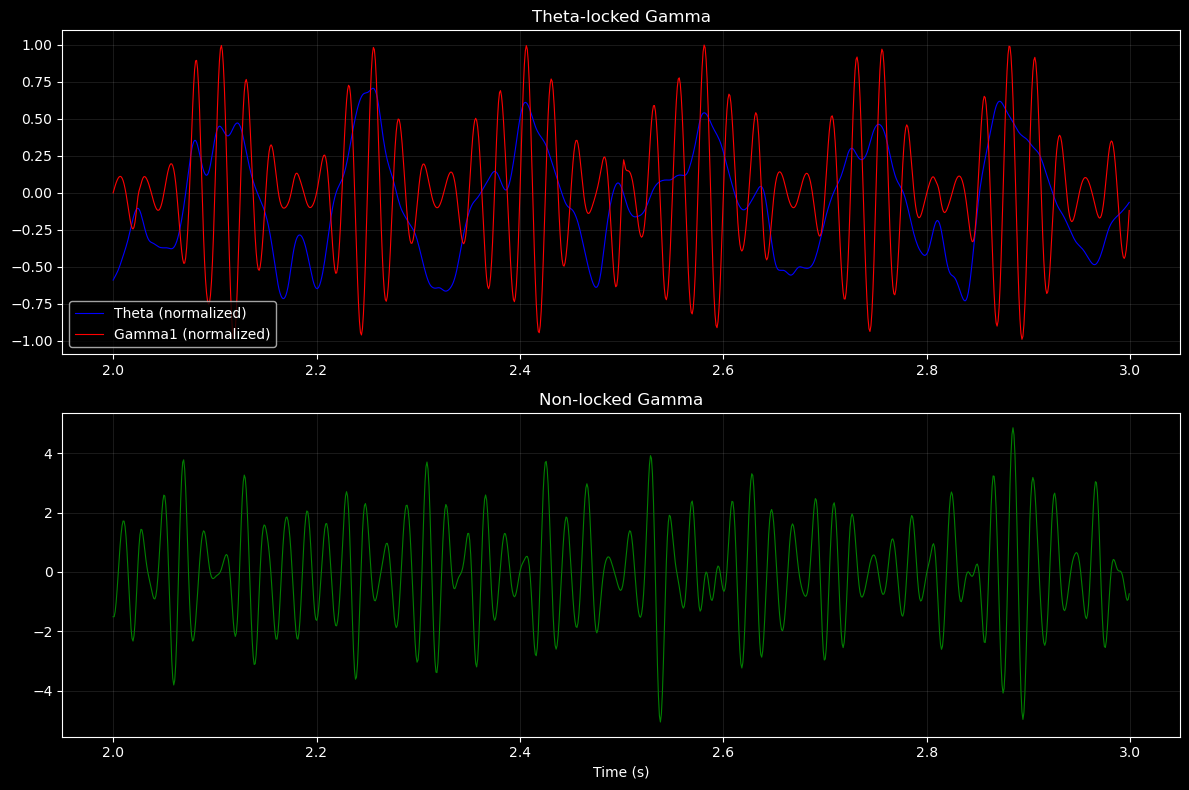

In [20]:
plt.style.use('dark_background')

# Plot with refined styling
plt.figure(figsize=(12, 8), facecolor='black')

# Plot 1: Gamma1 (theta-locked) and theta
plt.subplot(211)
segment = slice(int(2*srate), int(3*srate))  # Plot 1 second
plt.plot(times[segment], theta_wave[segment]/max(abs(theta_wave)), 'b', 
        label='Theta (normalized)', linewidth=0.8)
plt.plot(times[segment], gamma1_wave[segment]/max(abs(gamma1_wave)), 'r', 
        label='Gamma1 (normalized)', linewidth=0.8)
plt.title('Theta-locked Gamma', color='white')
plt.legend(facecolor='black', labelcolor='white')
plt.grid(True, alpha=0.1)
plt.tick_params(colors='white')

# Plot 2: Gamma2 (not locked)
plt.subplot(212)
plt.plot(times[segment], gamma2_wave[segment], 'g', linewidth=0.8)
plt.title('Non-locked Gamma', color='white')
plt.xlabel('Time (s)', color='white')
plt.grid(True, alpha=0.1)
plt.tick_params(colors='white')

# Adjust overall appearance
for ax in plt.gcf().axes:
   ax.set_facecolor('black')
   for spine in ax.spines.values():
       spine.set_color('white')

plt.tight_layout()
plt.show()

REPLACING DIPOLES

Data ranges after scaling:
EEG data range: -149.51 to 140.47 µV


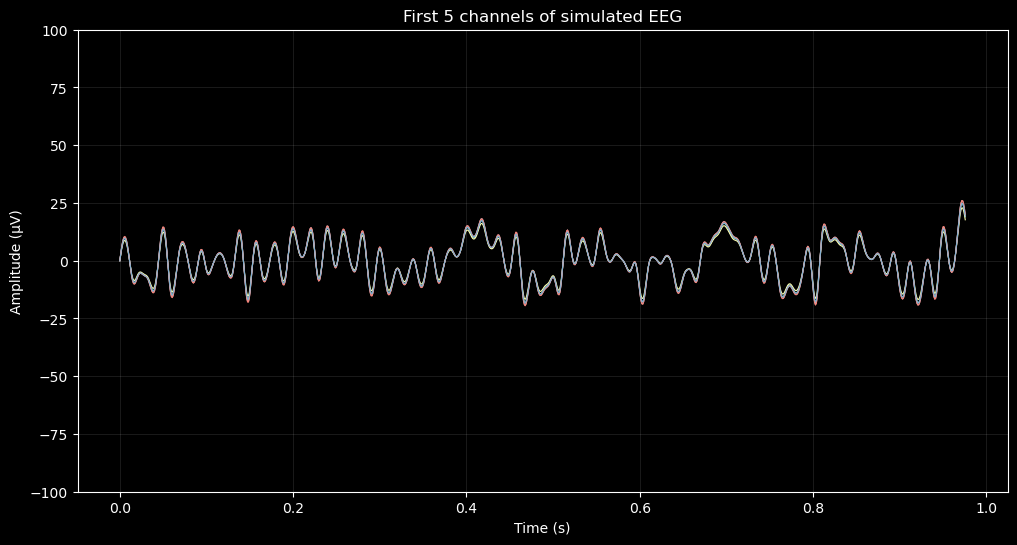

In [39]:
# Scale down the projections
scaling_factor = 1/50  # This should bring values to more realistic range

# Project to scalp with scaling
EEG_data = lf_gain_fixed[whichOri_adj, :, :] @ data * scaling_factor

# Check the new ranges
print("Data ranges after scaling:")
print(f"EEG data range: {np.min(EEG_data):.2f} to {np.max(EEG_data):.2f} µV")

# Plot with more realistic scale
plt.figure(figsize=(12, 6), facecolor='black')
plt.plot(times[:1000], EEG_data[:5, :1000].T, linewidth=0.8)
plt.title('First 5 channels of simulated EEG', color='white')
plt.xlabel('Time (s)', color='white')
plt.ylabel('Amplitude (µV)', color='white')
plt.ylim([-100, 100])  # Set more realistic EEG amplitude limits
plt.grid(True, alpha=0.1)
plt.tick_params(colors='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.gca().set_facecolor('black')
plt.show()

In [ ]:
MAKING MNE OBJECT AND VERIFYING AGAIN

In [ ]:
# Create MNE Raw object from our simulated EEG data
ch_names = [f'EEG{i:03d}' for i in range(EEG_data.shape[0])]
ch_types = ['eeg'] * EEG_data.shape[0]
info = mne.create_info(ch_names=ch_names, sfreq=srate, ch_types=ch_types)

# Create Raw object
raw = mne.io.RawArray(EEG_data, info)

# Print info
print("=== MNE Raw Info ===")
print(raw.info)

print("\n=== Data Properties ===")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Data duration: {raw.times[-1]:.2f} seconds")
print(f"Data shape: {raw.get_data().shape}")
print(f"Data range: {raw.get_data().min():.2f} to {raw.get_data().max():.2f} µV")

# Optional: plot a brief segment to verify
raw.plot(duration=2, start=0, scalings='auto', title='Simulated EEG', n_channels=10)

Creating RawArray with float64 data, n_channels=64, n_times=10241
    Range : 0 ... 10240 =      0.000 ...    10.000 secs
Ready.
=== MNE Raw Info ===
<Info | 7 non-empty values
 bads: []
 ch_names: EEG000, EEG001, EEG002, EEG003, EEG004, EEG005, EEG006, EEG007, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1024.0 Hz
>

=== Data Properties ===
Number of channels: 64
Sampling rate: 1024.0 Hz
Data duration: 10.00 seconds
Data shape: (64, 10241)
Data range: -149.51 to 140.47 µV
Using qt as 2D backend.


WHOLE CODE SHORT VERSION

In [2]:
# Script 1: Generate and Save Simulated EEG Data
import numpy as np
from scipy import signal
import mne
import scipy.io as sio

# Load necessary data and setup parameters
file_path = r"C:\Users\fedor\Documents\CODE\EEG\PAC_WM_Cohen\emptyEEG.mat"
eeg_data = sio.loadmat(file_path)

# Extract parameters
srate = float(eeg_data['EEG']['srate'][0,0][0,0])
n_timepoints = eeg_data['EEG']['pnts'][0,0][0,0]
times = eeg_data['EEG']['times'][0,0][0]
lf_gain = eeg_data['lf']['Gain'][0,0]
lf_gain_fixed = np.transpose(lf_gain, (1,0,2))

# Parameters
theta_dipole_adj = 94 - 1
gam1_dipole_adj = 109 - 1
gam2_dipole_adj = 111 - 1
whichOri_adj = 0

def filterFGx(data, srate, lower_freq, upper_freq):
    nyq = srate/2
    b, a = signal.butter(2, [lower_freq/nyq, upper_freq/nyq], btype='band')
    return signal.filtfilt(b, a, data)

# Generate source time courses
# 1. Theta
theta_freq = 6
ampl1 = 5 + 10 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30)
freqmod1 = signal.detrend(10 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30))
theta_wave = ampl1 * np.sin(2*np.pi * theta_freq * times + 2*np.pi/srate * np.cumsum(freqmod1))

# 2. Gamma bursts
gamma_freq = 40
theta_phase = np.angle(signal.hilbert(theta_wave))
mod1 = 0.1 + 0.9 * (1 + np.real(np.exp(1j * theta_phase))) / 2
gamma1_wave = mod1 * np.sin(2*np.pi * gamma_freq * times)

ampl2 = 2 + 5 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30)
freqmod2 = signal.detrend(10 * filterFGx(np.random.randn(n_timepoints), srate, 1, 30))
gamma2_wave = ampl2 * np.sin(2*np.pi * 50 * times + 2*np.pi/srate * np.cumsum(freqmod2))

# Create source data
n_dipoles = lf_gain.shape[2]
data = np.zeros((n_dipoles, n_timepoints))

# Replace key dipole time series
data[theta_dipole_adj] = theta_wave * 10
data[gam1_dipole_adj] = gamma1_wave * 10
data[gam2_dipole_adj] = gamma2_wave * 20

# Project to scalp with adjusted scaling
scaling_factor = 1/100  # Adjusted scaling
EEG_data = lf_gain_fixed[whichOri_adj, :, :] @ data * scaling_factor

# Create MNE Raw object
ch_names = [f'EEG{i:03d}' for i in range(EEG_data.shape[0])]
ch_types = ['eeg'] * EEG_data.shape[0]
info = mne.create_info(ch_names=ch_names, sfreq=srate, ch_types=ch_types)
raw = mne.io.RawArray(EEG_data, info)

# Print verification
print("=== Data Verification ===")
print(f"Raw data shape: {raw.get_data().shape}")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Data range: {raw.get_data().min():.2f} to {raw.get_data().max():.2f} µV")

# Save the raw object
save_path = 'simulated_eeg_raw.fif'
raw.save(save_path, overwrite=True)

# Save as mat file for potential MATLAB use
save_path_mat = 'simulated_eeg_data.mat'
savemat_dict = {
    'EEG_data': EEG_data,
    'srate': srate,
    'times': times,
    'ch_names': ch_names
}
sio.savemat(save_path_mat, savemat_dict)

print("\n=== Files Saved ===")
print(f"MNE Raw file: {save_path}")
print(f"MATLAB file: {save_path_mat}")

# Print additional verification
print("\n=== Signal Properties ===")
print(f"Theta frequency: {theta_freq} Hz")
print(f"Gamma frequencies: {gamma_freq} Hz and 50 Hz")
print(f"Data duration: {times[-1]:.2f} seconds")

Creating RawArray with float64 data, n_channels=64, n_times=10241
    Range : 0 ... 10240 =      0.000 ...    10.000 secs
Ready.
=== Data Verification ===
Raw data shape: (64, 10241)
Sampling rate: 1024.0 Hz
Number of channels: 64
Data range: -74.90 to 54.35 µV
Overwriting existing file.
Writing C:\Users\fedor\simulated_eeg_raw.fif
Closing C:\Users\fedor\simulated_eeg_raw.fif
[done]

=== Files Saved ===
MNE Raw file: simulated_eeg_raw.fif
MATLAB file: simulated_eeg_data.mat

=== Signal Properties ===
Theta frequency: 6 Hz
Gamma frequencies: 40 Hz and 50 Hz
Data duration: 10.00 seconds
